# Loading Data

In [2]:
import pandas as pd  # type: ignore

df = pd.read_csv('D:\Project\ML final project\salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


# Preprocessing Data

## Data infomation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Data preprocessing 

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10093 non-null  int64 
 1   experience_level    10093 non-null  object
 2   employment_type     10093 non-null  object
 3   job_title           10093 non-null  object
 4   salary              10093 non-null  int64 
 5   salary_currency     10093 non-null  object
 6   salary_in_usd       10093 non-null  int64 
 7   employee_residence  10093 non-null  object
 8   remote_ratio        10093 non-null  int64 
 9   company_location    10093 non-null  object
 10  company_size        10093 non-null  object
dtypes: int64(4), object(7)
memory usage: 946.2+ KB


<Axes: >

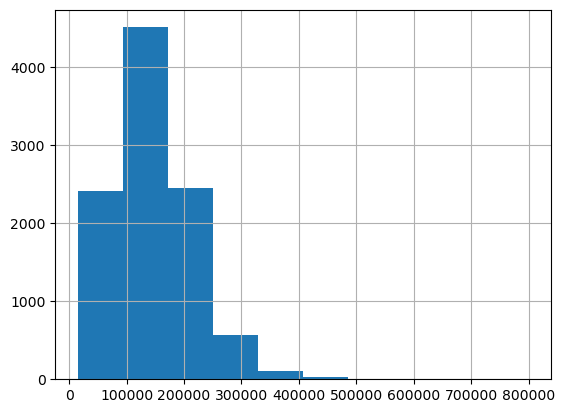

In [7]:
#Visualization of salary
df['salary_in_usd'].hist()

# Prepare for Linear Regression


## Seperating Data into X and y 

In [8]:
y = df[['salary', 'salary_currency', 'salary_in_usd']]
X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis = 1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 16493
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10093 non-null  int64 
 1   experience_level    10093 non-null  object
 2   employment_type     10093 non-null  object
 3   job_title           10093 non-null  object
 4   employee_residence  10093 non-null  object
 5   remote_ratio        10093 non-null  int64 
 6   company_location    10093 non-null  object
 7   company_size        10093 non-null  object
dtypes: int64(2), object(6)
memory usage: 709.7+ KB


## One Hot Encoding 
Turn the categories into numbers 

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
categorical_features = ['experience_level',
                        'employment_type',
                        'job_title',
                        'employee_residence',
                        'company_location',
                        'company_size']
one_hot = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform= 'pandas')
transformer = ColumnTransformer([('one_hot',one_hot, categorical_features)], remainder= 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.024e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.024e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.024e+03,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.020e+03,
        1.000e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.020e+03,
        1.000e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.021e+03,
        5.000e+01]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,323,324,325,326,327,328,329,330,331,332
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2024.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2024.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2024.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2024.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2024.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2020.0,100.0
10089,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2021.0,100.0
10090,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2020.0,100.0
10091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2020.0,100.0


In [13]:
categorical_features_y = ['salary_currency']
one_hot_y = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform= 'pandas')
transformer_y = ColumnTransformer([('one_hot', one_hot_y, categorical_features_y)], remainder= 'passthrough')
transformed_y = transformer_y.fit_transform(y)
transformed_y

array([[      0.,       0.,       0., ...,       0.,  120000.,  120000.],
       [      0.,       0.,       0., ...,       0.,   70000.,   70000.],
       [      0.,       0.,       0., ...,       0.,  130000.,  130000.],
       ...,
       [      0.,       0.,       0., ...,       0.,  105000.,  105000.],
       [      0.,       0.,       0., ...,       0.,  100000.,  100000.],
       [      0.,       0.,       0., ...,       0., 7000000.,   94665.]])

In [14]:
pd.DataFrame(transformed_y)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120000.0,120000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70000.0,70000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,130000.0,130000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110000.0,110000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,240000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,412000.0,412000.0
10089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,151000.0,151000.0
10090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,105000.0,105000.0
10091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100000.0,100000.0


## Splitting Data

In [15]:
from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(transformed_X, transformed_y, test_size= 0.2, random_state= 100)

# Model Linear Regression 

## Training Model 

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [18]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,160000.0,160000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120000.0,120000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102000.0,102000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,314000.0,314000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192000.0,192000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,162225.0,162225.0
8070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,155000.0,155000.0
8071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,139000.0,139000.0
8072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,183500.0,183500.0


In [19]:
pd.DataFrame(y_train_pred)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000938,-0.001920,-0.001837,-1.717376e-16,8.673617e-18,2.602085e-17,0.007200,-0.001633,1.734723e-17,0.000556,...,0.000124,0.000332,0.000560,-0.000070,0.0,-0.000211,0.998618,0.000200,157863.5,167294.15625
1,0.000104,-0.001531,0.003340,-4.041906e-16,-3.469447e-17,-1.700029e-16,0.005274,0.010762,-1.908196e-17,0.000658,...,0.000264,0.000691,-0.000576,0.000202,0.0,0.000094,0.979853,0.000223,108595.0,103827.37500
2,0.000129,-0.000725,0.001923,-4.215378e-16,-5.724587e-17,-7.112366e-17,0.001701,-0.006347,-3.642919e-17,0.000414,...,0.000053,0.000262,-0.001551,-0.000071,0.0,0.000579,1.005523,-0.000029,128797.5,131218.81250
3,0.000253,-0.000909,0.115137,6.071532e-16,2.255141e-17,3.989864e-16,0.002633,-0.002240,3.469447e-17,-0.000058,...,0.000096,0.000156,-0.000519,0.000042,0.0,-0.000165,0.886721,-0.000542,179435.5,174554.12500
4,-0.003421,-0.000992,-0.006866,-2.480655e-16,-2.255141e-17,-2.532696e-16,-0.008274,-0.000926,-3.295975e-17,0.000337,...,0.000568,-0.000691,-0.010086,0.000232,0.0,-0.000541,1.033393,-0.000747,195754.0,203952.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8069,-0.001546,0.000084,-0.012269,-1.187765e-14,-1.476250e-15,-1.934217e-15,-0.004337,0.003463,-1.634110e-15,-0.000205,...,-0.000066,-0.000195,-0.000704,-0.000093,0.0,-0.000246,1.018022,-0.000071,134400.5,142420.28125
8070,0.000285,-0.000025,0.000520,3.469447e-17,1.734723e-18,2.428613e-17,0.000159,-0.007846,2.255141e-17,0.000348,...,-0.000207,-0.000002,-0.000669,-0.000258,0.0,0.000139,1.009709,0.000111,162304.5,170288.65625
8071,0.000393,-0.001030,-0.000792,-3.018419e-16,-4.683753e-17,7.806256e-17,0.001780,0.002464,-3.295975e-17,0.000250,...,-0.000076,-0.000174,0.000140,-0.000134,0.0,0.000156,0.998951,-0.000128,150601.0,159319.03125
8072,0.003300,-0.000608,-0.000444,-2.619432e-16,-1.040834e-17,-1.214306e-17,-0.015269,-0.005936,8.673617e-18,0.000205,...,-0.000620,-0.000086,-0.000738,0.000041,0.0,-0.002470,1.021331,-0.000142,231163.0,201696.71875


## Evaluate Model 

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

In [21]:
print('model coefficients: ', lr.coef_)
print('model intercept: ', lr.intercept_)
print('lr train mean square error: ', lr_train_mse)
print('lr test mean square error: ', lr_test_mse)
print('lr train r2 score: ', lr_train_r2)
print('lr test r2 score: ', lr_test_r2)

model coefficients:  [[-3.97449690e+02 -3.97449573e+02 -3.97449956e+02 ...  1.72860417e+07
  -6.78435201e-04  1.71526917e-05]
 [-6.14889985e+03 -6.14890043e+03 -6.14890115e+03 ...  2.67430385e+08
   2.25044787e-04 -5.95208257e-06]
 [ 2.54570121e+04  2.54570135e+04  2.54570132e+04 ... -1.10718636e+09
  -1.91040337e-03  4.35560942e-05]
 ...
 [-8.75349489e+02 -8.75349116e+02 -8.75349127e+02 ...  3.80710334e+07
   2.34914478e-04  1.57440081e-06]
 [-9.81843470e+10 -9.81842415e+10 -9.81843056e+10 ...  4.27026979e+15
  -4.15131250e+03 -1.05468750e+02]
 [-9.29036785e+09 -9.29029465e+09 -9.29034926e+09 ...  4.04058817e+14
   3.48910156e+03 -4.59062500e+01]]
model intercept:  [-5.17850543e+06 -8.01160902e+07  3.31687974e+08  1.21101663e-02
  1.31542374e-02  9.27110228e-03  1.07096616e+08 -4.94273184e+07
  1.41919751e-02 -4.98967893e+06  1.21144208e-02 -1.08079743e+08
 -1.24429892e+08  7.28312292e+06  1.31568253e-02 -4.96789841e+06
  3.80988553e+07 -2.17334245e+07  1.63060141e+07  0.00000000e+00
